In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection as ms
import sklearn.datasets as ds
import sklearn

In [2]:
data = ds.load_iris()
df = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])
df.target.replace({0:'setosa',1:'versicolor',2:'virginica'},inplace=True)
df
df.sample(frac=1).reset_index(drop=True)
X = data['data']
y = data['target']

<ipython-input-2-ff0bb614f686>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.target.replace({0:'setosa',1:'versicolor',2:'virginica'},inplace=True)


In [3]:
X_train, X_test, y_train, y_test = ms.train_test_split(X,y,test_size=0.3)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
kf = ms.KFold(n_splits=10,shuffle=True,)
X_trains = []
X_tests = []
y_trains = []
y_tests = []
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_trains.append(X_train)
    X_tests.append(X_test)
    y_trains.append(y_train)
    y_tests.append(y_test)

In [6]:
from sklearn import tree

In [7]:
clf = tree.DecisionTreeClassifier()

In [8]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
clf.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2])

In [10]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2])

In [11]:
clf.score(X_test,y_test)

1.0

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
clf2 = GaussianNB()
clf2.fit(X_train,y_train)

GaussianNB()

In [14]:
y_proba = clf2.predict_proba(X_test)

In [15]:
y_pred = clf2.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2])

In [16]:
pos = 0

pos_proba = y_proba[:,pos]
neg_proba = y_proba[:,1:3]
neg_proba = [item.sum() for item in neg_proba]
for i in np.where(y_pred==2):
    y_pred[i] = 1

y_pred = 1-y_pred

y_true = y_test.copy()

for i in np.where(y_true==2):
    y_true[i] = 1
y_true = 1-y_true


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_confusion_matrix(cm, labels,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    fig = plt.figure()
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    classes=[None if i%2==0 else labels[int((i-1)/2)] for i in range(2*len(labels)+1)]
    plt.imshow(cm,
           cmap=cmap,
           extent=[0,len(classes)-1,0,len(classes)-1],
           aspect=1)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, reversed(classes))

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    cm2 = np.array(list(reversed(cm)))
    for i,j in itertools.product(range(len(classes)), range(len(classes))):
        if i%2==1 and j%2==1:
            plt.text(j,i, format(cm2[int((i-1)/2), int((j-1)/2)], fmt),
                     horizontalalignment="center",verticalalignment="center",
                     color="white" if cm2[int((i-1)/2), int((j-1)/2)] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    return fig

In [19]:
cm = sklearn.metrics.confusion_matrix(y_true,y_pred)

Confusion matrix


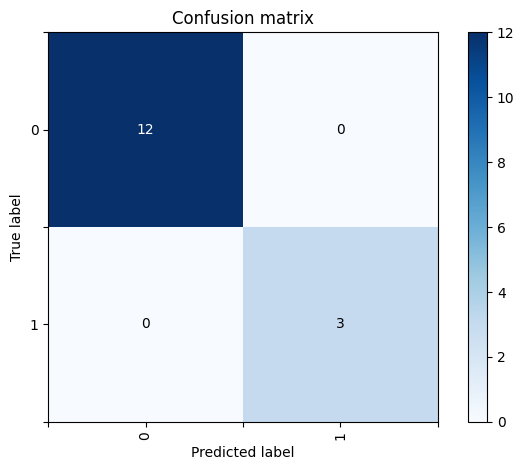

In [20]:
fig = plot_confusion_matrix(cm,['0','1'])
fig.savefig('cm.eps')

In [21]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
y_pred2 = y_pred.copy()

In [23]:
y_pred2[7] =0

In [24]:
y_pred2

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
cm

array([[12,  0],
       [ 0,  3]])

In [26]:
from sklearn.metrics import *
from sklearn.calibration import *
def performance_metrics(y_true,y_score,y_pred,pos):
    y_score = y_score[:,pos]
    y_score2 = []
    for ys in y_score:
        if ys>1:
            y_score2.append(1)
        else:
            y_score2.append(ys)
    y_score = y_score2
    #f1 score
    f1 = f1_score(y_true,y_pred,average="macro",pos_label=pos)
    print('F1 score: {0:0.2f}'.format(f1))

    #precision recall curve
    precision, recall, thresholds = precision_recall_curve(y_true,y_score,pos_label=pos)


    print('Average precision: {0:0.2f}'.format(np.mean(precision)))
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.figure()
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
              np.mean(precision)))



    #ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_true,y_score,pos_label=pos)
    auc = np.trapz(tpr,fpr)
    print('ROC curve AUC= {0:0.2f}'.format(auc))
    plt.figure()
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve AUC= {0:0.2f}'.format(
              auc))


    #accuracy
    accuracy = accuracy_score(y_true,y_pred)
    print('Accuracy: {0:0.2f}'.format(accuracy))

    #brier score
    brier = brier_score_loss(y_true,y_score)
    print('Brier score: {0:0.2f}'.format(brier))

In [27]:
probas2 = list(zip(list(neg_proba),list(pos_proba)))

In [28]:
probas2 = np.array(probas2)

In [29]:
def flip(b,ids):
    a = b.copy()
    for i in ids:
        c = a[i][0]
        a[i][0] = a[i][1]
        a[i][1] = c
    return a

In [30]:
y_probas3 = flip(probas2,[0,1,2,3,6,7,12])

In [31]:
thr = 0.5
y_pred3 = []
for item in y_probas3:
    if item[0]>=0.5:
        y_pred3.append(0)
    else:
        y_pred3.append(1)
y_pred3

[0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0]

F1 score: 0.35
Average precision: 0.30
ROC curve AUC= 0.67
Accuracy: 0.53
Brier score: 0.47


<ipython-input-26-90f6506a83a7>:40: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc = np.trapz(tpr,fpr)


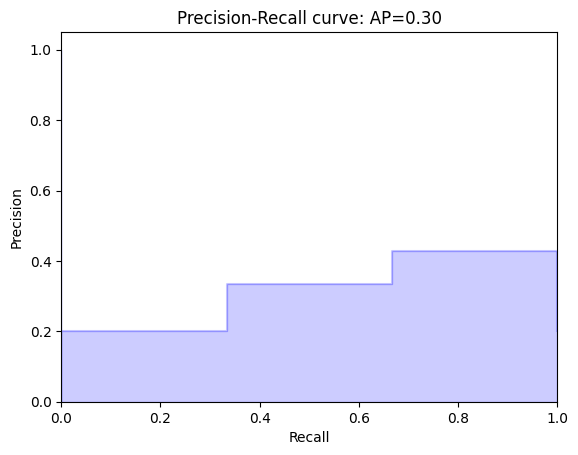

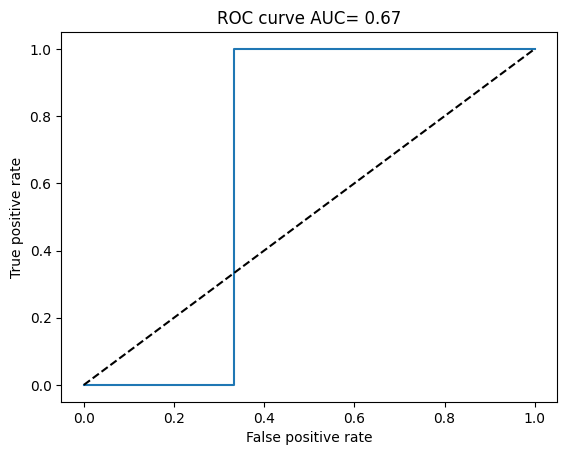

In [32]:
performance_metrics(y_true,y_probas3,y_pred3,1)

In [33]:
y_probas3

array([[1.00000000e+000, 1.63332029e-019],
       [1.00000000e+000, 2.71317624e-021],
       [1.00000000e+000, 6.78174353e-018],
       [2.11087893e-117, 1.00000000e+000],
       [1.00000000e+000, 1.28911351e-098],
       [1.00000000e+000, 1.85440592e-052],
       [1.66385441e-096, 1.00000000e+000],
       [1.64601539e-037, 1.00000000e+000],
       [1.00000000e+000, 4.37339205e-270],
       [1.00000000e+000, 5.04729125e-163],
       [1.00000000e+000, 2.70339576e-282],
       [1.00000000e+000, 1.25786561e-206],
       [1.13685943e-145, 1.00000000e+000],
       [1.00000000e+000, 8.58971141e-219],
       [1.00000000e+000, 4.42453545e-233]])

In [34]:
observed = np.random.uniform(0,100,50)

In [35]:
predicted = observed + np.random.uniform(-10,10,50)

Text(0, 0.5, 'Predicted')

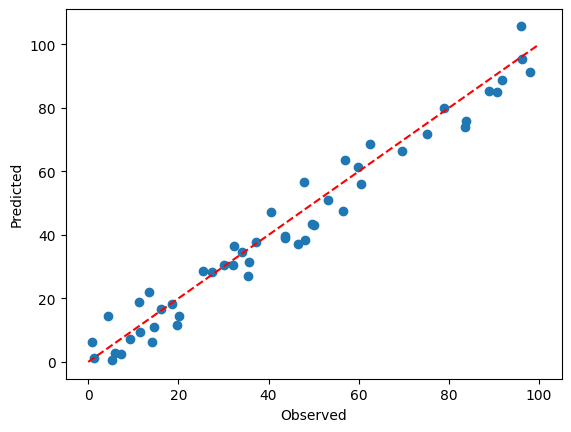

In [36]:
plt.scatter(observed,predicted)
plt.plot([0,100],[0,100],'r--')
plt.xlabel('Observed')
plt.ylabel('Predicted')

In [37]:
import scipy

In [38]:
scipy.stats.pearsonr(observed,predicted)[0]

np.float64(0.9818716081409355)

In [39]:
def computeCosineSimilarity(ratingPairs):
    numPairs = 0
    sum_xx = sum_yy = sum_xy = 0

    for ratingX, ratingY in ratingPairs:
        sum_xx += ratingX * ratingX
        sum_yy += ratingY * ratingY
        sum_xy += ratingX * ratingY
        numPairs+=1
    numerator = sum_xy
    denominator = np.sqrt(sum_xx) * np.sqrt(sum_yy)

    score = 0
    if (denominator):
        score = (numerator / (float(denominator)))

    return (score, numPairs)

In [40]:
computeCosineSimilarity(list(zip(observed,predicted)))

(np.float64(0.9941975148175731), 50)

In [41]:
np.sqrt(sklearn.metrics.mean_squared_error(observed,predicted))

np.float64(5.675304948770667)